# DICE on ABA

In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%run nifti_tools.ipynb
%run overlap_functions.ipynb

In [2]:
# Loading the comprehensive overlap dataframe of brain regions and Jacobian
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# Sorting the dataframe by DICE coeff and resetting the index
sorted_df = overlap_df.sort_values(by=['DICE_neg_jcb_anat'], ascending=False, na_position='last')
sorted_df.reset_index(drop=True, inplace=True)

# Choosing top hits until the overlap with jacobian reaches a threshold
threshold = 0.51
thresh_df = sorted_df[sorted_df['jac_overlap_ratio'].cumsum() < threshold]

print('Last index included to reach an overlap of {} with Jacobian is {}.'\
.format(threshold, thresh_df.shape[0]))

thresh_df.head()

Last index included to reach an overlap of 0.51 with Jacobian is 15.


,full_ant_index,structure,acronym,ish_id,ant_id,in_200_atlas,region_overlap_ratio,jac_overlap_ratio,DICE_neg_jcb_anat
0,1201,"""internal capsule""","""int""",566.0,6,True,0.810606,0.071716,0.131773
1,573,"""Caudoputamen""","""CP""",83.0,672,True,0.088754,0.097855,0.093083
2,610,"""Globus pallidus, external segment""","""GPe""",127.0,1022,True,0.643617,0.040550,0.076293
3,703,"""Reticular nucleus of the thalamus""","""RT""",315.0,262,True,0.586592,0.035188,0.066393
4,1188,"""arbor vitae""","""arb""",656.0,728,True,0.117841,0.035858,0.054985


In [3]:
'''
Brain regions to add:
1. "Primary visual area, layer 5", "VISp5" : 778
2. "Anterior cingulate area, dorsal part, layer 5", "ACAd5" : 1015
3. "Dentate gyrus, granule cell layer", "DG-sg" : 632
4. "Locus ceruleus", "LC" : 147
5. "Substantia nigra, compact part", "SNc" : 374
'''
extra_acronyms_list = ["VISp5", "ACAd5", "DG-sg", "LC", "SNc"]
extra_antid_list = [778, 1015, 632, 147, 374]

In [4]:
# Sortment of Brain regions into groups
worse_ids_list = [672, 463, 507]
converge_ids_list = [6, 1022, 1009, 867, 976, 1031, 147, 374, 778, 632]
plateau_ids_list = [262, 728, 484682528, 718, 81, 1091, 1015]

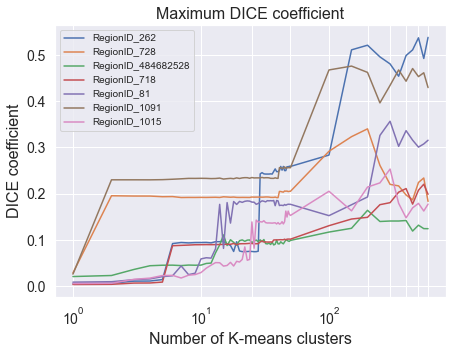

In [25]:
cluster_path = '/data/bioprotean/ABA/SFT/Kmeans_rc/'
plot_regions_DICE(plateau_ids_list, cluster_path)

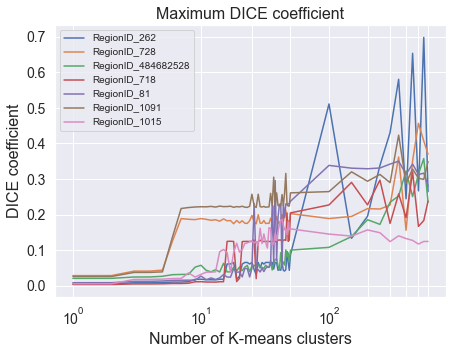

In [26]:
cluster_path = '/data/bioprotean/ABA/KernelPCA/poly3/Kmeans_rc/'
plot_regions_DICE(plateau_ids_list, cluster_path)

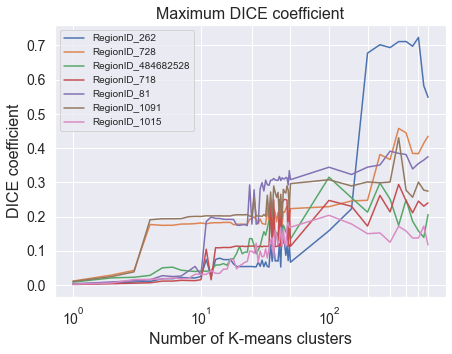

In [27]:
cluster_path = '/data/bioprotean/ABA/PCA/80_variance/Kmeans_labels/'
plot_regions_DICE(plateau_ids_list, cluster_path)